## 分析A/B测试结果


<a id='intro'></a>
### 简介
了解的是电子商务网站运行的 A/B 测试的结果，帮助公司弄清楚他们是否应该使用新的页面，保留旧的页面，或者应该将测试时间延长。



In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` 现在，导入 `ab_data.csv` 数据，并将其存储在 `df` 中。 

a. 导入数据集，并在这里查看前几行：

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. 使用下面的单元格来查找数据集中的行数。

In [3]:
df.shape[0]

294478

c. 数据集中独立用户的数量。

In [4]:
df['user_id'].nunique()

290584

d. 用户转化的比例。

In [5]:
df['converted'].mean()

0.11965919355605512

e.  `new_page` 与 `treatment` 不一致的次数。

In [6]:
# 筛出landing_page列中new_page元素数据集，赋值到df_new
df_new = df.query('landing_page == "new_page"')

# 筛出groupe列中treatment元素数据集，赋值到df_tre
df_tre = df.query('group == "treatment"')

# 求出df_new中不是treatment元素的行数，df_tre中不是new_page的行数
# 将两个值相加，即为new_page 与 treatment 不一致的次数
df_new.query('group != "treatment"').shape[0] + df_tre.query('landing_page != "new_page"').shape[0]

3893


f. 是否有任何行存在缺失值？

In [7]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` 对于 **treatment** 不与 **new_page** 一致的行或 **control** 不与 **old_page** 一致的行，我们不能确定该行是否真正接收到了新的或旧的页面。
a. 现在，使用测试题的答案创建一个符合测试规格要求的新数据集。将新 dataframe 存储在 **df2** 中。

In [8]:
df2 = df[((df['group']=='treatment')&(df['landing_page']=='new_page'))|((df['group']=='control')&(df['landing_page']=='old_page'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` 使用 **df2** 与下面的单元格来回答课堂中的 **测试3** 。

a.  **df2** 中有多少唯一的 **user_id**?

In [10]:
df2.user_id.nunique()

290584

b.  **df2** 中有一个重复的 **user_id** 。它是什么？ 

In [11]:
df2['user_id'].value_counts().head(1)

773192    2
Name: user_id, dtype: int64

c. 这个重复的  **user_id** 的行信息是什么？

In [12]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. 删除 **一个** 含有重复的 **user_id** 的行， 但需要确保你的 dataframe 为 **df2**。

In [13]:
# 删除 一个 含有重复的 user_id 的行
df2.drop(1899, inplace=True)

I:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
# 确认已删除
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [15]:
# 重设index
df2 = df2.reset_index(drop=True)

`4.` 在下面的单元格中，使用 **df2** 来回答。

a. 不管它们收到什么页面，单个用户的转化率是多少？


In [16]:
df2['converted'].mean()

0.11959708724499628

b. 假定一个用户处于 treatment 组中，他的转化率是多少？

In [17]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. 假定一个用户处于 `treatment` 组中，他的转化率是多少？


In [18]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. 一个用户收到新页面的概率是多少？


In [19]:
(df2.landing_page == 'new_page').mean()

0.50006194422266881

e. 使用这个问题的前两部分的结果，给出你的建议：你是否认为有证据表明一个页面可以带来更多的转化？在下面写出你的答案。

**不能。从以上的结果中只能从整体的显示出用户在control组转化率高于treatment组，但其他条件不够充分表明可以带来更多的转化，需进行A/B测试得出结论。**

<a id='ab_test'></a>
### II - A/B 测试

由于与每个事件相关的时间戳，可以在进行每次观察时连续运行假设检验。  <br><br> 


然而，问题的难点在于，一个页面被认为比另一页页面的效果好得多的时候你就要停止检验吗？还是需要在一定时间内持续发生？需要将检验运行多长时间来决定哪个页面比另一个页面更好？


`1.` 现在，要考虑的是，需要根据提供的所有数据做出决定。如果想假定旧的页面效果更好，除非新的页面在类型I错误率为5％的情况下才能证明效果更好，那么，零假设和备择假设是什么？ 

**零假设：$p_{old}$  -  $p_{new}$  >= 0**  
**备择假设：$p_{old}$  -  $p_{new}$  < 0**

`2.` 假定在零假设中，不管是新页面还是旧页面， $p_{new}$ and $p_{old}$ 都具有等于 **转化** 成功率的“真”成功率，也就是说，  $p_{new}$ 与 $p_{old}$ 是相等的。此外，假设它们都等于**ab_data.csv** 中的 **转化** 率，新旧页面都是如此。  <br><br>

每个页面的样本大小要与 **ab_data.csv** 中的页面大小相同。  <br><br>

执行两次页面之间 **转化** 差异的抽样分布，计算零假设中10000次迭代计算的估计值。  <br><br>

a. 在零假设中，$p_{new}$ 的 **convert rate（转化率）** 是多少？


In [20]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. 在零假设中， $p_{old}$  的 **convert rate（转化率）** 是多少？ <br><br>

In [21]:
# 新界面转换率和旧界面转换率相等
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c.  $n_{new}$ 是多少？

In [22]:
n_new = (df2.group == 'treatment').sum()
n_new

145310

d.  $n_{old}$?是多少？

In [23]:
n_old = (df2.group == 'control').sum()
n_old

145274

e. 在零假设中，使用 $p_{new}$ 转化率模拟 $n_{new}$ 交易，并将这些 $n_{new}$ 1's 与 0's 存储在 **new_page_converted** 中。

In [24]:
new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new, (1-p_new)])

f. 在零假设中，使用 $p_{old}$ 转化率模拟 $n_{old}$ 交易，并将这些  $n_{old}$ 1's 与 0's 存储在 **old_page_converted** 中。

In [25]:
old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old, (1-p_old)])

g. 在 (e) 与 (f)中找到 $p_{new}$ - $p_{old}$ 模拟值。

In [26]:
# new_page_converted和old_page_converted大小不一致，所以先要统一数据行数
new_page_converted = new_page_converted[:145274]

In [27]:
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
p_diff

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
        -6.88354420e-06,   0.00000000e+00,   0.00000000e+00])

h. 使用**a. 到 g. ** 中的计算方法来模拟 10,000个 $p_{new}$ - $p_{old}$ 值，并将这 10,000 个值存储在 **p_diffs** 中。

In [28]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. 绘制一个 **p_diffs** 直方图。

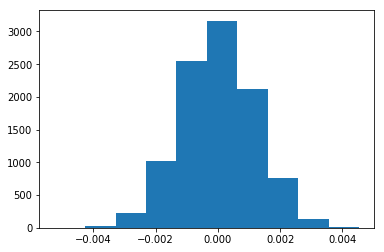

In [29]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

j.  在**p_diffs**列表的数值中，有多大比例大于 **ab_data.csv** 中观察到的实际差值？

In [30]:
diffs  = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()

In [31]:
(p_diffs > diffs).mean()

0.9113

k. 这个值是什么？ 这个值在新旧页面中是否有区别呢？

**这个值是p值，p值较大于0.05，没有证据拒绝原假设。p值在新旧页面几乎没有区别**


l. 我们也可以使用一个内置程序 （built-in）来实现类似的结果。尽管使用内置程序可能更易于编写代码，但上面的内容是对正确思考统计显著性至关重要的思想的一个预排。填写下面的内容来计算每个页面的转化次数，以及每个页面的访问人数。使用 `n_old` 与 `n_new` 分别引证与旧页面和新页面关联的行数。

In [32]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()
n_old = len(df2.query('group == "control"'))
n_new = len(df2.query('group == "treatment"'))

I:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. 现在使用 `stats.proportions_ztest` 来计算你的检验统计量与 p-值。[这里](http://knowledgetack.com/python/statsmodels/proportions_ztest/) 是使用内置程序的一个有用链接。

In [33]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

In [34]:
from scipy.stats import norm
norm.cdf(z_score), norm.ppf(1-(0.05))

(0.90505831275902449, 1.6448536269514722)

n. 在上一个问题中计算出的z-分和p-值是否意味着新旧页面的转化率？它们与 **j.** 与 **k.** 中的结果一致吗？

**z_score的值为1.3109，小于显著性水平95%的值1.6449，所以接受零假设。p值是0.905，远大于5%，与j、k的p值结果几乎一致。**

<a id='regression'></a>
### III - 回归分析法之一

`1.` 在最后一部分中，之前的A / B测试中获得的结果也可以通过执行回归来获取。<br><br>

a. 既然每行的值是转化或不转化，那么在这种情况下，我们应该执行哪种类型的回归？

**逻辑回归。**

b. 目标是使用 **statsmodels** 来拟合你在 **a.** 中指定的回归模型，以查看用户收到的不同页面是否存在显著的转化差异。但是，首先，需要为这个截距创建一个列 ，并为每个用户收到的页面创建一个虚拟变量列。添加一个 **截距** 列，一个 **ab_page** 列，当用户接收 **treatment** 时为1， **control** 时为0。

In [35]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']


c. 使用 **statsmodels** 导入你的回归模型。 实例化该模型，并使用 **b.** 中创建的2个列来拟合该模型，用来预测一个用户是否会发生转化。

In [36]:
import statsmodels.api as sm
logit = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. 请模型摘要

In [37]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 01 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:21:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. 与 **ab_page** 关联的 p-值是多少？ 为什么它与 **II** 中发现的结果不同？<br><br>  

**与ab_page关联的p值为0.19，比partII的p值小，因为partII是单尾测试。回归模型的零假设为p_new - p_old = 0, 备择假设为p_new - p_old != 0**



f. 现在，你一定在考虑其他可能影响用户是否发生转化的因素。讨论为什么考虑将其他因素添加到回归模型中是一个不错的主意。在回归模型中添加附加项有什么弊端吗？

**还有一些其他因素也能影响到新旧界面转换率的结果，比如访问页面的时间，访问的地区差异等，增加一些其他因素可以防止结果过于片面，但是添加附加项的弊端是添加过多可能会使结果出现辛普森悖论等与实际情况不相符的情况。**

g. 现在，除了测试不同页面的转化率是否会发生变化之外，还要根据用户居住的国家或地区添加一个 effect 项。需要导入 **countries.csv** 数据集，并将数据集合并在适当的行上。


In [38]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


In [40]:
df_countries.country.value_counts()

# country列一共有3个元素

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [41]:
# 将countries.csv里的country数据join进ab测试数据中
df_3 = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [42]:
# 创建country列的虚拟变量
df_3[['UK', 'CA', 'US']] = pd.get_dummies(df_3['country'])[['UK', 'CA', 'US']]
df_3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,CA,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0


In [43]:
# 建立模型
df_3['intercept'] = 1
lm = sm.Logit(df_3['converted'], df_3[['intercept', 'UK', 'CA']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Jul 2018   Pseudo R-squ.:               1.521e-05
Time:                        11:25:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

**结论：该模型中，UK和CA的p值都大于0.05，所以国家元素对新旧页面的转化率没有显著影响。**

h. 虽然已经查看了国家与页面在转化率上的个体性因素，但现在我们要查看页面与国家/地区之间的相互作用，测试其是否会对转化产生重大影响。创建必要的附加列，并拟合一个新的模型。  

**提示：页面与国家/地区的相互作用**
```
df3['new_CA'] = df3['new_page'] * df3['CA']
df3['new_UK'] = df3['new_page'] * df3['UK']
```

In [44]:
df_3['page_CA'] = df_3['ab_page'] * df_3['CA']
df_3['page_UK'] = df_3['ab_page'] * df_3['UK']
df_3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,CA,US,page_CA,page_UK
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,0,1


In [45]:
# 模型中加入页面因素
df_3['intercept'] = 1
lm = sm.Logit(df_3['converted'], df_3[['intercept', 'ab_page','CA', 'UK', 'page_CA', 'page_UK']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 01 Jul 2018   Pseudo R-squ.:               3.482e-05
Time:                        11:25:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
page_CA       -0.0469      0.054     -0.872      0.383      -0.152       0.059
page_UK        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

**结论：模型中加入页面因素后，发现页面、国家和国家地区与页面相互作用列的p值都大于0.05，所以页面与国家相互作用下，该测试表明对转化结果没有显著影响。**

<a id='conclusions'></a>
## 总结

**通过A/B测试，可以发现旧页面稍微好于新页面，两者差距不大。通过ztest来计算检验统计量与 p-值，可以验证这个结论基本正确。但是在现实中，我们发现只通过这些因素来验证新旧页面的转换率较为片面，我们建立模型，加入国家地区因素，试图研究该因素对新旧页面的转化率差距是否有显著性影响，最终模型发现单一的国家地区因素和国家地区与页面的相互作用下，都对新旧页面转换率没有显著性的影响。**
